Particle in an EM wave
============

This week we are looking at electromagnetic waves.  Certainly a charged particle will experience a force if an EM wave passes nearby.  So let's see what happens.

We start off by importing a few modules and setting a constant.

In [1]:
%matplotlib notebook
from matplotlib import pyplot as pp
from matplotlib import animation
from numpy import array,cos, arange
import pdb

c = 3e8 #m/s

In order to solve for the motion of a charged particle in an external EM wave, we need to solve for the equations of motion for the particle.  A Newton's 2nd law analysis results in the following:
$$\frac{d^2x}{dt^2}=\frac{q}{m}\left(E_i+v_j\times B_k - v_k\times B_j\right)$$
where $i,j, \textrm{ and } k$ represent the three components of motion.  One can solve for the motion in the y and z directions by changing the subscripts appropriately.

In order to solve this using a computer, we will using a generic 2nd order Runge-Kutta integration solver.  We will need to break our 2nd order ODE into two first order ODEs, which can be done by recognizing that
$$\frac{dx}{dt}=v.$$
As such, three functions are definied below to solve the equation of motion at a particular time step: 2 ODEs and the Runga Kutta solver itself.

In [2]:
def velocityODE(v,**kwargs):
    i = kwargs['dim']
    if i == 0:
        j,k = 1,2
    if i == 1:
        j,k = 2,0
    if i == 2:
        j,k = 0,1
    if i > 2:
        print 'Error in velocityODE'
        exit(1)

    return (kwargs['q']/kwargs['m']*kwargs['E'][i] + kwargs['V'][j]*kwargs['B'][k]
        -kwargs['V'][k]*kwargs['B'][j])

def positionODE(x,**kwargs):
    i = kwargs['dim']
    return kwargs['velocity'][i]


def rk2(x,h,ode,**kwargs):
    #Generic Second order RK.  Kwags allows for any number of arguments
    #depending on the specific problem
    k0 = h * ode(x,**kwargs)
    k1 = h * ode(x+k0/2.,**kwargs)
    return x + k1

Next, I've opted to create a class for our particle.  This puts all of the relevant information about our particle, including, even, the E and B fields that it is immersed in at its specific position in space, as well as the functions that we will use to operate on it.  Additionally, I've given our particle class it's own plotting methods- in this case a simple animation that shows the motion of the particle for a handful of seconds after t=0.

Remember, the equation of motion that we are using is defined above already.  Below, the built in functions are simply being used.

In [3]:
class Particle:
    '''Base class for a particle'''

    def __init__(self,initialPosition,initialVelocity,q,m,E0,B0,w,k,dt=0.01):
        self.initialVelocity = initialVelocity
        self.initialPosition = initialPosition
        self.q = q
        self.m = m
        self.w = w
        self.k = k
        self.dt = dt
        self.fig = pp.figure()
        self.ax1 = self.fig.add_subplot(2,1,1)
        self.ax2 = self.fig.add_subplot(2,1,2)
        self.timeTemplate = 'time = %.1fs'
        self.timeText = self.ax1.text(.30,0.4,'')

        self.E0 = array(E0)
        self.B0 = array(B0)
        self.anim = animation.FuncAnimation(self.fig,self.animate,\
            frames=500,repeat=False,interval=10,blit=False,init_func=self.setupPlot)


    def updateVelocity(self):
        update = []
        for dim in [0,1,2]:
            update.append(rk2(self.velocity[dim],self.dt,velocityODE,
            E=self.E,B=self.B,q=self.q,m=self.m,V = self.velocity,dim=dim))

        self.velocity = array(update)

    def updatePosition(self):
        update = []
        for dim in [0,1,2]:
            update.append(rk2(self.position[dim],self.dt,positionODE,
            velocity=self.velocity,dim=dim))
        self.position = array(update)

    def setupPlot(self):
        self.position = self.initialPosition
        self.velocity = self.initialVelocity
        self.ax1.set_xlabel('z')
        self.ax1.set_ylabel('y')
        self.ax2.set_xlabel('x')
        self.ax2.set_ylabel('y')

        self.scat1 = self.ax1.scatter(self.position[2],self.position[1],s=100)
        self.ax1.axis([-.5e0,.5e0,-.5e0,.5e0])
        self.scat2 = self.ax2.scatter(self.position[0],self.position[1],s=100)
        self.ax2.axis([-.5e0,.5e0,-.5e0,.5e0])

        return self.scat1,self.scat2

    def update(self,time):
        k = 1
        z = self.position[2]
        self.E = self.E0*cos(k*z-w*time)
        self.B = self.B0*cos(k*z-w*time)
        self.updateVelocity()
        self.updatePosition()


    def animate(self,i):
        self.update(i*self.dt)  # update the data
        self.timeText.set_text(self.timeTemplate % (i*self.dt))
        self.scat1.set_offsets([self.position[2],self.position[1]])
        self.scat2.set_offsets([self.position[0],self.position[1]])
        pdb.set_trace()

        return self.scat1,self.scat2


Finally, we can set our parameters and solve for the particle.  Below, the mass, charge, frequency, wave number, and initial position, velocity, electric and magnetic fields are set.  You can run this code block as is and you should see the particle move in the animation.  Your only job this week is to play around with this simultaion and try to get the particle to do different things.  I don't even care what you get it to do.  Add similar code to at least a couple more code blocks to show that you can make the particle behave differently.  Discuss that behavior and how it makes sense relative to the physics going on here.  Definitely look at one thing in particular: what do you have to do to get the particle to move in more than one direction?

One final note- changing any of these parameters will likely have a huge affect on the results.  It is very easy to make it so that the particle leaves the plotted domain, which I have fixed in the setupPlot function above.  If your particle vanishes or doesn't seem to move at all, you may need to change the self.ax(1/2).axis variables, which define the x and y ranges for the plots.  In this case, it may help to print out the position of your particle so you can set these limits.  Good luck!

<IPython.core.display.Javascript object>


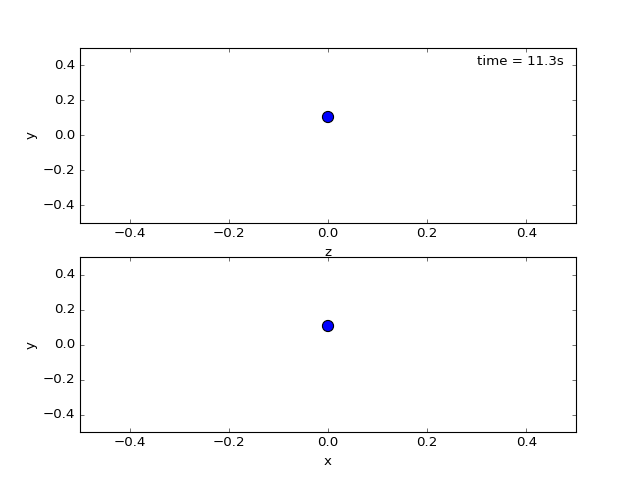

In [4]:
m0 = 1e-5
q0 = 1e-6
w = 1
k = 1
dt = (1/w)/15.
r0 = array([0,0,0])
v0 = array([0,0,0])
E0 = array([0,1,0])
B0 = array([E0[1]/c,E0[0]/c,0])


myParticle = Particle(r0,v0,q0,m0,E0,B0,w,k,dt=dt)
pp.show()
